In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")



In [3]:
data_path = "result.csv"


In [4]:
df = pd.read_csv(data_path)

In [5]:
df.head()

,;date;Дата_x;Посока;Рег. номер;Държава;Скорост;Клас;Лента;Дължина;Тегло;Станция;Дата_y;Температура в °C;Точка на оросяване в °C;Относителна влажност в %;Интензивност на валеж в mm/h;Видимост в m;Средна скорост на вятър в m/s;Средна посока на вятър в °;Темп. на повърхността на настилката в °C;Точка на замръзване в °C;Състояние на повърхността;Предупреждение за състояние на повърхността;Височина на водния стълб в µm;Темп. под повърхн. на дълб. 5 см в °C;Макс. скорост на вятър в m/s;Посока на вятъра при макс. скорост в °
0,0;2023-03-29 12:00:00;29.3.2023 г. 12:00:06;Ок...
1,1;2023-03-29 12:00:00;29.3.2023 г. 12:00:07;Це...
2,2;2023-03-29 12:00:00;29.3.2023 г. 12:00:08;Ок...
3,3;2023-03-29 12:00:00;29.3.2023 г. 12:00:10;Ок...
4,4;2023-03-29 12:00:00;29.3.2023 г. 12:00:11;Ок...


In [6]:
input_file = 'result.csv'
output_file = 'result_comma.csv'

with open(input_file, 'r', encoding='utf-8') as f_in, open(output_file, 'w', encoding= 'utf-8') as f_out:
    for line in f_in:
        updated_line = line.replace(';', ',')
        f_out.write(updated_line)

In [7]:
df2 = pd.read_csv(output_file)
df2.head()


,Unnamed: 0,date,Дата_x,Посока,Рег. номер,Държава,Скорост,Клас,Лента,Дължина,...,Средна скорост на вятър в m/s,Средна посока на вятър в °,Темп. на повърхността на настилката в °C,Точка на замръзване в °C,Състояние на повърхността,Предупреждение за състояние на повърхността,Височина на водния стълб в µm,Темп. под повърхн. на дълб. 5 см в °C,Макс. скорост на вятър в m/s,Посока на вятъра при макс. скорост в °
0,0,2023-03-29 12:00:00,29.3.2023 г. 12:00:06,Околовръстно,-6295152506763664080,NaN,56.0,1.0,L6,2168.0,...,4.6,326.0,14.3,0.0,DR,NaN,0.0,11.2,8.7,3.0
1,1,2023-03-29 12:00:00,29.3.2023 г. 12:00:07,Център,140823469443,NaN,50.0,0.0,L2,2200.0,...,4.6,326.0,14.3,0.0,DR,NaN,0.0,11.2,8.7,3.0
2,2,2023-03-29 12:00:00,29.3.2023 г. 12:00:08,Околовръстно,140823469443,NaN,43.0,1.0,L5,3400.0,...,4.6,326.0,14.3,0.0,DR,NaN,0.0,11.2,8.7,3.0
3,3,2023-03-29 12:00:00,29.3.2023 г. 12:00:10,Околовръстно,140823469443,NaN,50.0,1.0,L5,9947.0,...,4.6,326.0,14.3,0.0,DR,NaN,0.0,11.2,8.7,3.0
4,4,2023-03-29 12:00:00,29.3.2023 г. 12:00:11,Околовръстно,140823469443,NaN,48.0,1.0,L6,3600.0,...,4.6,326.0,14.3,0.0,DR,NaN,0.0,11.2,8.7,3.0


In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)
df_imputed.to_csv('imputed_file.csv', index=False)
imputed_df = pd.read_csv('imputed_file.csv')
imputed_df.head()


,Unnamed: 0,date,Дата_x,Посока,Рег. номер,Държава,Скорост,Клас,Лента,Дължина,...,Средна скорост на вятър в m/s,Средна посока на вятър в °,Темп. на повърхността на настилката в °C,Точка на замръзване в °C,Състояние на повърхността,Предупреждение за състояние на повърхността,Височина на водния стълб в µm,Темп. под повърхн. на дълб. 5 см в °C,Макс. скорост на вятър в m/s,Посока на вятъра при макс. скорост в °
0,0,2023-03-29 12:00:00,29.3.2023 г. 12:00:06,Околовръстно,-6295152506763664080,BG,56.0,1.0,L6,2168.0,...,4.6,326.0,14.3,0.0,DR,-,0.0,11.2,8.7,3.0
1,1,2023-03-29 12:00:00,29.3.2023 г. 12:00:07,Център,140823469443,BG,50.0,0.0,L2,2200.0,...,4.6,326.0,14.3,0.0,DR,-,0.0,11.2,8.7,3.0
2,2,2023-03-29 12:00:00,29.3.2023 г. 12:00:08,Околовръстно,140823469443,BG,43.0,1.0,L5,3400.0,...,4.6,326.0,14.3,0.0,DR,-,0.0,11.2,8.7,3.0
3,3,2023-03-29 12:00:00,29.3.2023 г. 12:00:10,Околовръстно,140823469443,BG,50.0,1.0,L5,9947.0,...,4.6,326.0,14.3,0.0,DR,-,0.0,11.2,8.7,3.0
4,4,2023-03-29 12:00:00,29.3.2023 г. 12:00:11,Околовръстно,140823469443,BG,48.0,1.0,L6,3600.0,...,4.6,326.0,14.3,0.0,DR,-,0.0,11.2,8.7,3.0


In [9]:
selected_columns = ['Скорост', 'Дължина']
data_selected = imputed_df[selected_columns]
data_selected.to_csv('selected_data.csv', index=False) 
data_selected.head()

,Скорост,Дължина
0,56.0,2168.0
1,50.0,2200.0
2,43.0,3400.0
3,50.0,9947.0
4,48.0,3600.0


In [16]:
#from sklearn.preprocessing import LabelEncoder, StandardScaler
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
#
#numeric_features = data_selected.select_dtypes(include=['int', 'float']).columns
#categorical_features = data_selected.select_dtypes(include=['object']).columns
#encoder = LabelEncoder()
#
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', StandardScaler(), numeric_features),  # Нормализиране на числовите данни
#        ('cat', encoder, categorical_features)  # Кодиране на маркери за категорийните данни
#    ],
#    remainder='passthrough'  # Позволява останалите колони да останат без промяна
#)

#X = data_selected.values
#X_preprocessed = preprocessor.fit_transform(X)

ValueError: Specifying the columns using strings is only supported for dataframes.

In [11]:
means = data_selected.mean()
stds = data_selected.std()

# Z-стандартизация на данните
z_standardized_data = (data_selected - means) / stds
z_standardized_data

,Скорост,Дължина
0,0.719138,-0.889056
1,0.256977,-0.873848
2,-0.282211,-0.303564
3,0.256977,2.807813
4,0.102924,-0.208517
...,...,...
770460,-0.128157,-0.303564
770461,-0.128157,-0.303564
770462,-0.128157,-0.303564
770463,-0.128157,-0.303564


In [18]:
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters)
gmm.fit(z_standardized_data)
labels = gmm.predict(z_standardized_data)


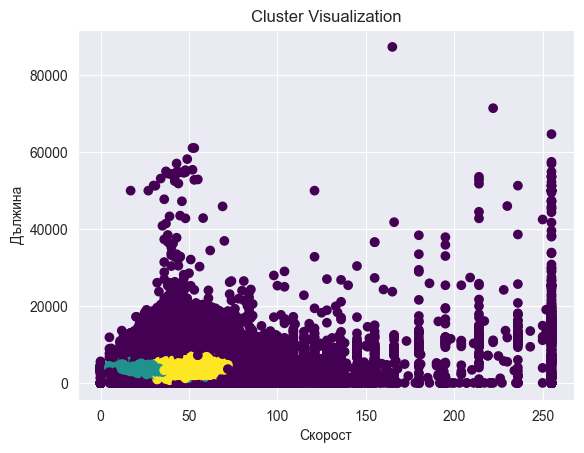

In [15]:
import matplotlib.pyplot as plt
plt.scatter(data_selected['Скорост'], data_selected['Дължина'], c=labels, cmap='viridis')
plt.xlabel('Скорост')
plt.ylabel('Дължина')
plt.title('Cluster Visualization')
plt.show() 